In [5]:
import pandas as pd
import os

LOW  = 0
MED = 1
HIGH = 2

In [6]:
classes = {LOW:0, MED:1, HIGH:2}

In [7]:
fulldataset = pd.read_csv('./data/fulldataset.csv')

In [16]:
fulldataset.head()

,Unnamed: 0,time,rate,pktsize,L1-dcache-load-misses,L1-dcache-loads,L1-dcache-stores,L1-icache-load-misses,LLC-load-misses,LLC-loads,...,iTLB-loads,instructions,minor-faults,node-load-misses,node-loads,node-store-misses,node-stores,page-faults,ref-cycles,task-clock
0,0,1.000579,6500,256,21489013.0,1.374002e+09,624131974.0,67096.0,5527.0,15397637.0,...,361.0,3.975887e+09,0.0,1987.0,2556.0,347.0,2042.0,0.0,2.588692e+09,1000.384676
1,1,2.000904,6500,256,21456222.0,1.373770e+09,624130800.0,65870.0,3876.0,15395468.0,...,425.0,3.985078e+09,0.0,1944.0,1682.0,363.0,2013.0,0.0,2.588638e+09,1000.318001
2,2,3.001193,6500,256,21476618.0,1.374318e+09,623959885.0,66794.0,3463.0,15370208.0,...,408.0,3.988898e+09,0.0,2277.0,1527.0,458.0,2014.0,0.0,2.588665e+09,1000.277788
3,3,4.001459,6500,256,21473285.0,1.374003e+09,623838868.0,71208.0,3742.0,15325130.0,...,1593.0,3.991126e+09,20.0,2208.0,1326.0,388.0,2113.0,20.0,2.588627e+09,1000.239089
4,4,5.001745,6500,256,21456109.0,1.374419e+09,624383332.0,65581.0,3448.0,15358732.0,...,342.0,3.988123e+09,0.0,2051.0,1144.0,500.0,2001.0,0.0,2.588728e+09,1000.278351


In [9]:
## Building the stats
dstats = {} # Stats for all the experiments, indexed by k (rate_pktsize)
totalstats=fulldataset.drop(["rate", "pktsize"], axis=1).describe() # Stats for all the dataset
partials = {}# Individual per-exp dataset
means = {} # Means for all features, indexed by f (feature)
varia = {} # Means for all features, indexed by f (feature)


for r in range (500,10001,500):
    for p in ["64", "256", "imix"]:
        k = str(r)+"_"+p
        dstats[k] = fulldataset.loc[fulldataset["rate"] == str(r)].loc[fulldataset["pktsize"] == p].describe()
        partials[k] = (fulldataset.loc[fulldataset["rate"] == str(r)].loc[fulldataset["pktsize"] == p]).drop(["rate", "pktsize"], axis=1)
        
        for f in dstats[k].columns:
            if (f not in means.keys()):
                means[f] = []               
            if (f not in varia.keys()):
                varia[f] = []
 
            means[f].append(dstats[k].loc["mean"][f])
            varia[f].append(dstats[k].loc["std"][f])

/Users/ucaclip/opt/anaconda3/envs/ml-for-highspeed-networks/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [13]:
#stats["5000_64"].loc["std"].sort_values()
dstats["5000_64"].loc["mean"]

Unnamed: 0              NaN
time                    NaN
rate                    NaN
L1-dcache-load-misses   NaN
L1-dcache-loads         NaN
L1-dcache-stores        NaN
L1-icache-load-misses   NaN
LLC-load-misses         NaN
LLC-loads               NaN
LLC-store-misses        NaN
LLC-stores              NaN
branch-load-misses      NaN
branch-misses           NaN
branches                NaN
bus-cycles              NaN
cache-misses            NaN
cache-references        NaN
context-switches        NaN
cpu-clock               NaN
cycles                  NaN
dTLB-load-misses        NaN
dTLB-store-misses       NaN
dTLB-stores             NaN
iTLB-load-misses        NaN
iTLB-loads              NaN
instructions            NaN
minor-faults            NaN
node-load-misses        NaN
node-loads              NaN
node-store-misses       NaN
node-stores             NaN
page-faults             NaN
ref-cycles              NaN
task-clock              NaN
Name: mean, dtype: float64

In [14]:
#for index, row in fulldataset.iterrows():

normal_dataset = {}

for k in partials.keys():
    #normal_dataset[k] = ( (partials[k] - dstats[k].loc["mean"])/dstats[k].loc["std"] )# Wrong! As I'm normalizing per dataset and not fully
    normal_dataset[k] = ( (partials[k] - totalstats.loc["mean"] )/totalstats.loc["std"]  )
    #print (dstats[k].loc["mean"])
    #standard_fulldataset = 

In [15]:
normal_dataset["3500_256"].describe().loc["mean"]

Unnamed: 0              NaN
time                    NaN
L1-dcache-load-misses   NaN
L1-dcache-loads         NaN
L1-dcache-stores        NaN
L1-icache-load-misses   NaN
LLC-load-misses         NaN
LLC-loads               NaN
LLC-store-misses        NaN
LLC-stores              NaN
branch-load-misses      NaN
branch-misses           NaN
branches                NaN
bus-cycles              NaN
cache-misses            NaN
cache-references        NaN
context-switches        NaN
cpu-clock               NaN
cycles                  NaN
dTLB-load-misses        NaN
dTLB-store-misses       NaN
dTLB-stores             NaN
iTLB-load-misses        NaN
iTLB-loads              NaN
instructions            NaN
minor-faults            NaN
node-load-misses        NaN
node-loads              NaN
node-store-misses       NaN
node-stores             NaN
page-faults             NaN
ref-cycles              NaN
task-clock              NaN
Name: mean, dtype: float64

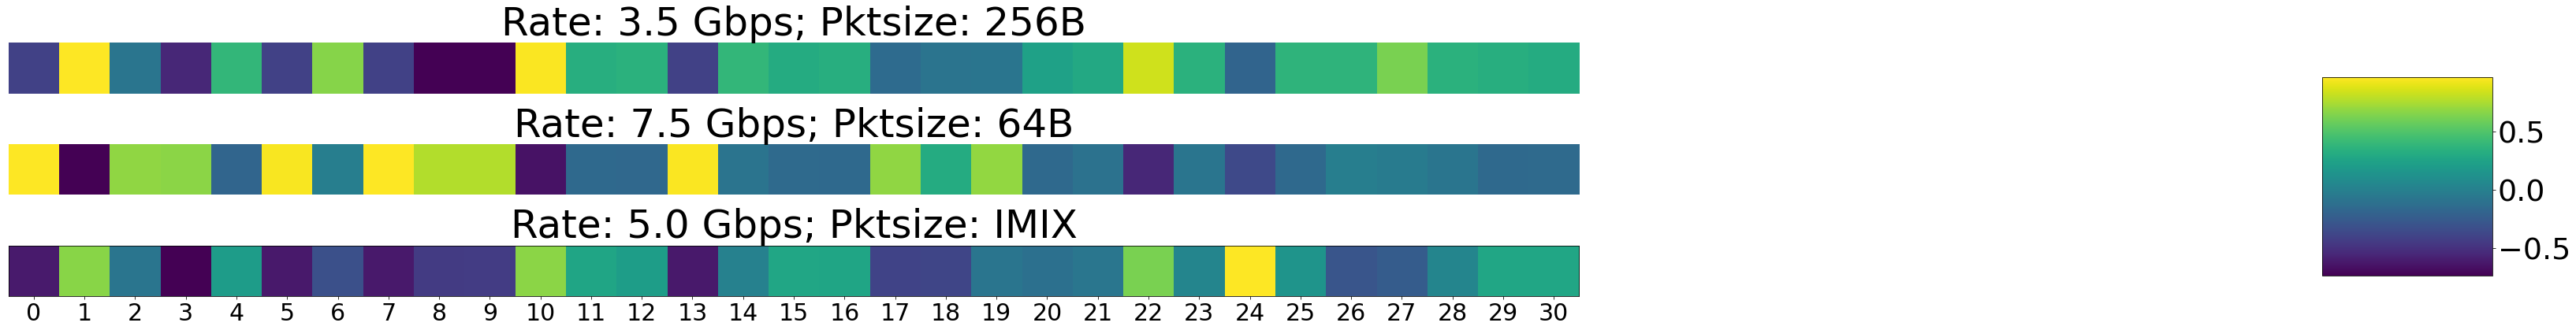

In [112]:
# Rebuild the three examples with the new data
av = []
sv = []
mv = []
vshaped=[]

a = normal_dataset["3500_256"].describe().drop('time', axis=1)
b = normal_dataset["7500_64"].describe().drop('time', axis=1)
c = normal_dataset["5000_imix"].describe().drop('time', axis=1)

for i in [a,b,c]:
    av.append(i.loc["mean"])
    sv.append(i.loc["std"])
    mv.append(i.loc["max"])

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(60, 5))


im1 = ax1.imshow(av[0].values.reshape((1,31)))
im2 = ax2.imshow(av[1].values.reshape((1,31)))
im3 = ax3.imshow(av[2].values.reshape((1,31)))

ax1.axis('off')
ax2.axis('off')
#ax3.axis('off')
ax3.axes.get_yaxis().set_visible(False)

ax1.autoscale(False)
ax2.autoscale(False)
ax3.autoscale(False)
plt.tight_layout()


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im3, cax=cbar_ax)

plt.tick_params(labelsize=38)
#plt.labelsize(68)

ax1.set_title("Rate: 3.5 Gbps; Pktsize: 256B", size=50)
ax2.set_title("Rate: 7.5 Gbps; Pktsize: 64B", size=50)
ax3.set_title("Rate: 5.0 Gbps; Pktsize: IMIX", size=50)
plt.subplots_adjust(wspace=0.01,hspace=1)


plt.sca(ax3)
plt.xticks(range(31),  color='black', size=30)

plt.show()

fig.savefig("/tmp/foo.pdf", bbox_inches='tight')

In [128]:
av[0].reset_index()["feature"]

0     L1-dcache-load-misses
1           L1-dcache-loads
2          L1-dcache-stores
3     L1-icache-load-misses
4           LLC-load-misses
5                 LLC-loads
6          LLC-store-misses
7                LLC-stores
8        branch-load-misses
9             branch-misses
10                 branches
11               bus-cycles
12             cache-misses
13         cache-references
14         context-switches
15                cpu-clock
16                   cycles
17         dTLB-load-misses
18        dTLB-store-misses
19              dTLB-stores
20         iTLB-load-misses
21               iTLB-loads
22             instructions
23             minor-faults
24         node-load-misses
25               node-loads
26        node-store-misses
27              node-stores
28              page-faults
29               ref-cycles
30               task-clock
Name: feature, dtype: object

In [99]:
df = pd.DataFrame()
for r in range (500,10001,500):
    for p in ["64", "256", "imix"]:
        k = str(r)+"_"+p
        s = normal_dataset[k].describe().loc["mean"].drop(['time'])
        s = s.rename(k)
        df = pd.concat([df, s], axis=1)
        #print (normal_dataset[k].describe().loc["mean"].drop(['time']) )

In [101]:
df.to_csv('~/git/data/ml-for-highspeed-networks/normalized_features.csv')

In [155]:
a = normal_dataset["3500_256"].drop('time', axis=1)
b = normal_dataset["8000_64"].drop('time', axis=1)
c = normal_dataset["6000_imix"].drop('time', axis=1)

astr="3500_256"
bstr="8000_64"
cstr="6000_imix"



In [178]:
import math
vals = []

first = c.describe().loc["mean"]

for p in ["64", "256", "imix"]:
    for r in range (500,10001,500):
        k = str(r)+"_"+p
        tmp = normal_dataset[k].drop('time', axis=1).describe().loc["mean"]
        vals.append ( (k, sum(tmp*first)/ ( math.sqrt( sum(first*first) )*math.sqrt(sum(tmp*tmp))  )  )   )
    vals.append ((" ", " "))
    vals.append ((" ", " "))
for i,j in vals:
    print (i,j)        

500_64 0.5983178644467588
1000_64 0.6404247155233552
1500_64 0.5254093021004149
2000_64 0.10915794047202876
2500_64 -0.33264566300361126
3000_64 -0.5729165963432125
3500_64 -0.6255419449369065
4000_64 -0.706523778203211
4500_64 -0.7681786726791461
5000_64 -0.8238680672988853
5500_64 -0.8554397654633413
6000_64 -0.8730492664331398
6500_64 -0.8780608054544642
7000_64 -0.8865321035275034
7500_64 -0.8706160924525609
8000_64 -0.8454082880120671
8500_64 -0.8135198128933008
9000_64 -0.7813560945431505
9500_64 -0.7639228138588925
10000_64 -0.7456449866673394
   
   
500_256 0.610490593385074
1000_256 0.6866848537286238
1500_256 0.6976496122965768
2000_256 0.706720341455876
2500_256 0.7179763156880415
3000_256 0.7132446350043051
3500_256 0.6869254630501413
4000_256 0.6342418633200692
4500_256 0.5729240284955988
5000_256 0.4604956757807929
5500_256 0.24063458873208068
6000_256 0.1669347013760824
6500_256 -0.011456240422015014
7000_256 -0.11565809103410447
7500_256 -0.2030220876487275
8000_256 -0

In [179]:
labels = []

for p in ["64", "256", "imix"]:
    for r in range (500,10001,500):
        k = str(r)+"_"+p
        labels.append(k)

In [183]:
vals = []
for i in labels:
    first = normal_dataset[i].drop('time', axis=1).describe().loc["mean"]
    inner = []
    for j in labels:
        tmp = normal_dataset[j].drop('time', axis=1).describe().loc["mean"]
        inner.append ( (j, sum(tmp*first)/ ( math.sqrt( sum(first*first) )*math.sqrt(sum(tmp*tmp))  )  )   )
    vals.append((i, inner))
    vals.append ((" ", []))
    vals.append ((" ", []))

In [192]:
f = open("/tmp/similarity_matrix.dat", "w")
for (i,j) in vals:
    k = ""
    for (x,y) in j:
        k+=x+":"+str(y)+" "
    f.write(i+"; "+k)
    f.write("\n")

f.close()

In [13]:
normal_dataset["500_64"].describe()

feature,time,L1-dcache-load-misses,L1-dcache-loads,L1-dcache-stores,L1-icache-load-misses,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,branch-load-misses,...,iTLB-loads,instructions,minor-faults,node-load-misses,node-loads,node-store-misses,node-stores,page-faults,ref-cycles,task-clock
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,...,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,0.000172,-0.859641,1.439387,0.545942,-1.094179,-0.201315,-0.887154,0.313499,-0.864200,-1.159170,...,0.141238,1.494204,-0.013701,-0.843998,-0.141907,0.599171,0.119443,-0.013701,0.080298,0.049225
std,1.001866,0.001917,0.047014,0.069980,0.310289,0.918882,0.002994,0.512091,0.001549,0.012072,...,1.039358,0.061844,0.983531,0.713566,0.912644,1.139499,0.247206,0.983531,1.261594,1.263160
min,-1.673173,-0.862469,1.337482,0.396526,-1.867758,-0.469376,-0.891109,-0.604996,-0.868597,-1.185668,...,-0.154549,1.348885,-0.308019,-1.614223,-0.394353,-2.301327,-0.425325,-0.308019,-0.118747,-0.130547
25%,-0.836742,-0.860876,1.452053,0.564989,-1.290284,-0.425828,-0.889091,0.098447,-0.864954,-1.162055,...,-0.132396,1.509949,-0.308019,-1.162971,-0.376408,0.202898,-0.023542,-0.308019,-0.084444,-0.115268
50%,-0.000285,-0.860354,1.456256,0.570476,-1.122584,-0.395320,-0.888281,0.301100,-0.864060,-1.156108,...,-0.101803,1.517047,-0.308019,-0.938305,-0.356204,0.809983,0.122885,-0.308019,-0.076942,-0.110788
75%,0.837869,-0.859460,1.461677,0.578846,-0.914856,-0.321793,-0.886776,0.453470,-0.863277,-1.152244,...,-0.066463,1.523808,-0.308019,-0.699557,-0.305129,1.284268,0.222885,-0.308019,-0.067182,-0.103514
max,1.676239,-0.853087,1.666789,0.895008,-0.013770,9.722345,-0.878243,5.682817,-0.855780,-1.098079,...,9.425774,1.786493,4.020192,8.778026,6.777816,4.727578,2.678225,4.020192,15.623154,15.607796


In [188]:
s = pd.Series([])
for i in means.keys():
    s3 = pd.Series([  pd.Series(means[i]).describe().loc["std"]/pd.Series(means[i]).describe().loc["mean"]], index=[i])
    s=s.append(s3)
    
print (s.sort_values())

time                     0.000165
task-clock               0.000207
cpu-clock                0.000207
ref-cycles               0.000220
bus-cycles               0.000221
cycles                   0.000221
context-switches         0.025716
node-store-misses        0.048381
LLC-store-misses         0.059729
node-stores              0.067476
L1-icache-load-misses    0.083417
cache-misses             0.102738
page-faults              0.103953
minor-faults             0.103953
L1-dcache-stores         0.106794
dTLB-stores              0.106804
node-load-misses         0.120870
instructions             0.142180
LLC-load-misses          0.152610
branches                 0.182447
L1-dcache-loads          0.202835
node-loads               0.251971
branch-misses            0.329903
branch-load-misses       0.329973
dTLB-store-misses        0.561812
iTLB-loads               0.827697
LLC-stores               0.908142
cache-references         0.915648
LLC-loads                0.922362
L1-dcache-load

<ipython-input-188-44b76932ddc9>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series([])


In [165]:
from scipy import stats
for i in means.keys():
    print (stats.describe(means[i]))

DescribeResult(nobs=60, minmax=(15.004264320017244, 15.014142474893102), mean=15.006770597502472, variance=6.136895968879411e-06, skewness=0.7935156690590394, kurtosis=-0.26989004449649023)
DescribeResult(nobs=60, minmax=(1375078.2586206896, 108095267.62068966), mean=29442595.318045978, variance=786507333184010.9, skewness=1.4041778118575656, kurtosis=0.9053585147460499)
DescribeResult(nobs=60, minmax=(1083274342.9413793, 2127766688.913793), mean=1502075442.1108046, variance=9.282576208080042e+16, skewness=0.28854408419585803, kurtosis=-1.0306720028954415)
DescribeResult(nobs=60, minmax=(585258938.7413793, 929614790.3551724), mean=692715503.7233334, variance=5472679485299728.0, skewness=1.249782981717547, kurtosis=1.6183395015403432)
DescribeResult(nobs=60, minmax=(55440.744827586204, 75615.66551724137), mean=64166.18632183907, variance=28649938.16417662, skewness=0.19395948236509475, kurtosis=-1.097919536746619)
DescribeResult(nobs=60, minmax=(3911.286206896552, 7926.448275862069), me

In [187]:
fulldataset = pd.DataFrame()

In [188]:
#router = ["fastclick", "vpp", "bess", "snabb", "ovs", "t4p4s"]
router = ["fastclick", "vpp", "bess", "snabb", "ovs"]


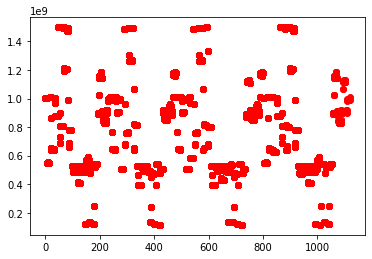

In [192]:
direc = "../poisson/"

for r in router:
    for files in os.listdir(direc+r):
        if "64-1000.csv" in files or "64-500.csv" in files:
            
            df = None
            
            if "10000" in files or "7500" in files:
                df = pd.read_csv(direc+r+"/"+files, header=None, skiprows=2)
                df.rename (columns = {0  : 'time', 1 : 'value', 3 : 'feature'}, inplace=True )

                df = df.set_index([ "time", "feature"])['value'].unstack()
                df = df.reset_index()            

                df["label"] = classes[HIGH]
              
            elif "5000" in files:
                df = pd.read_csv(direc+r+"/"+files, header=None, skiprows=2)
                df.rename (columns = {0  : 'time', 1 : 'value', 3 : 'feature'}, inplace=True )

                df = df.set_index([ "time", "feature"])['value'].unstack()
                df = df.reset_index()            

                df["label"] = classes[MED]
              
            elif "-500-" in files:
                df = pd.read_csv(direc+r+"/"+files, header=None, skiprows=2)
                df.rename (columns = {0  : 'time', 1 : 'value', 3 : 'feature'}, inplace=True )

                df = df.set_index([ "time", "feature"])['value'].unstack()
                df = df.reset_index()            

                df["label"] = classes[LOW]
                
            if (df is not None):
                df = df.loc[ df["time"] > 14.0 ]
                fulldataset = pd.concat([fulldataset, df], ignore_index=True)
                
                import matplotlib.pyplot as plt
                plt.plot(fulldataset['branches'], 'ro')
                

In [193]:
fulldataset = pd.concat([fulldataset, df_h], ignore_index=True)
fulldataset.to_csv("fulldataset-new.csv", index=False)

In [180]:
fulldataset

feature,time,L1-dcache-load-misses,L1-dcache-loads,L1-dcache-stores,L1-icache-load-misses,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,branch-load-misses,...,instructions,minor-faults,node-load-misses,node-loads,node-store-misses,node-stores,page-faults,ref-cycles,task-clock,label
0,20.007886,72184102.0,1.121487e+09,739448077.0,70828.0,10295.0,41345665.0,2519.0,11710200.0,8280373.0,...,3.689873e+09,0.0,2030.0,7620.0,450.0,2026.0,0.0,2.588810e+09,1000.286132,1
1,21.008191,72114251.0,1.121512e+09,739668313.0,70797.0,6339.0,46374482.0,2492.0,12987623.0,8295551.0,...,3.689946e+09,0.0,1982.0,4608.0,438.0,2101.0,0.0,2.588849e+09,1000.297864,1
2,22.008480,72057389.0,1.122281e+09,738933031.0,71183.0,4564.0,46429635.0,2442.0,13021889.0,8314801.0,...,3.687801e+09,0.0,2320.0,2209.0,403.0,2098.0,0.0,2.588769e+09,1000.268593,1
3,23.008767,72134073.0,1.121826e+09,739643932.0,73396.0,3904.0,46430091.0,2464.0,13022400.0,8295373.0,...,3.690566e+09,0.0,1963.0,2094.0,500.0,2076.0,0.0,2.588719e+09,1000.269813,1
4,24.009052,72105180.0,1.121303e+09,738607335.0,76032.0,3763.0,46406130.0,2467.0,13028487.0,8256987.0,...,3.689034e+09,0.0,2149.0,1635.0,514.0,2028.0,0.0,2.588785e+09,1000.259622,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6555,25.021529,5498843.0,1.943054e+09,734574265.0,56976.0,2163.0,3690250.0,2509.0,1223648.0,3066296.0,...,5.278643e+09,0.0,1931.0,215.0,597.0,2072.0,0.0,2.588800e+09,1000.206512,0
6556,26.021789,5467820.0,1.942916e+09,734592357.0,58512.0,2501.0,3678094.0,2621.0,1220247.0,3071287.0,...,5.282657e+09,0.0,1919.0,269.0,563.0,1925.0,0.0,2.588849e+09,1000.243770,0
6557,27.022040,5476154.0,1.943121e+09,734510655.0,57076.0,2176.0,3696083.0,2509.0,1226584.0,3065990.0,...,5.284630e+09,0.0,1970.0,178.0,583.0,1889.0,0.0,2.588902e+09,1000.235978,0
6558,28.022292,5487874.0,1.943386e+09,734676636.0,55944.0,2070.0,3709570.0,2565.0,1226124.0,3063794.0,...,5.283730e+09,0.0,1958.0,262.0,600.0,1988.0,0.0,2.588875e+09,1000.238227,0


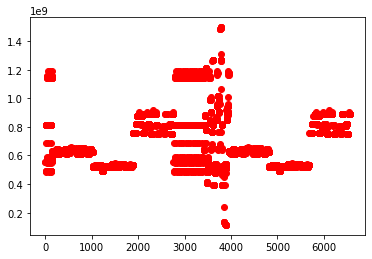

In [181]:
import matplotlib.pyplot as plt
plt.plot(fulldataset['branches'], 'ro')

In [196]:
for files in os.listdir():
    if "DC" in files:
        print (files)

pcpDC2_5000mbps_trainData1.csv
pcpDC2_500mbps_trainData3.csv
pcpDC2_9000mbps_trainData4.csv


In [205]:
df = pd.read_csv("pcpDC2_500mbps_trainData3.csv", header=None, skiprows=2)
df2 = pd.read_csv("pcpDC2_5000mbps_trainData1.csv", header=None, skiprows=2)
df3 = pd.read_csv("pcpDC2_9000mbps_trainData4.csv", header=None, skiprows=2)

df.head()


,0,1,2,3,4,5,6
0,0.100479,147699897.0,branches,12322284,12.28,1472.243,M/sec
1,0.100479,24210.0,branch-misses,16326974,16.27,0.020,of all branches
2,0.100479,24195.0,branch-load-misses,16320259,16.27,0.241,M/sec
3,0.100479,311.0,cache-misses,18708468,18.65,23.614,of all cache refs
4,0.100479,1317.0,cache-references,16000419,15.95,0.013,M/sec


In [ ]:
df.rename (columns = {0  : 'time', 1 : 'value', 2 : 'feature'}, inplace=True )
df = df.set_index([ "time", "feature"])['value'].unstack()
df = df.reset_index()


In [210]:
df3

,0,1,2,3,4,5,6
0,0.100582,143920368.0,branches,12400981,12.35,1433.563,M/sec
1,0.100582,23002.0,branch-misses,16403704,16.34,0.020,of all branches
2,0.100582,23122.0,branch-load-misses,16399743,16.33,0.230,M/sec
3,0.100582,2473.0,cache-misses,18592871,18.52,128.802,of all cache refs
4,0.100582,1920.0,cache-references,15998325,15.94,0.019,M/sec
...,...,...,...,...,...,...,...
310676,1004.852034,864.0,iTLB-load-misses,15425000,15.38,730.460,of all iTLB cache hits
310677,1004.852034,106.0,node-load-misses,15425017,15.38,0.001,M/sec
310678,1004.852034,6.0,node-loads,15424998,15.38,0.060,K/sec
310679,1004.852034,0.0,node-store-misses,7712503,7.69,0.000,K/sec


In [215]:
df2 = df2.set_index([ "time", "feature"])['value'].unstack()
df2 = df2.reset_index()

df3 = df3.set_index([ "time", "feature"])['value'].unstack()
df3 = df3.reset_index()



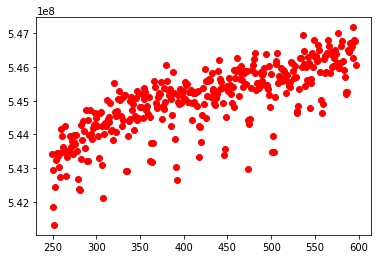

In [235]:
plt.plot(df3.loc [ (df3['time'] > 25) & (df3['time'] <60), ["instructions"]], 'ro')

In [239]:
df = df.loc [ (df["time"] > 25) & (df["time"] < 60)]
df2 = df2.loc [ (df2["time"] > 25) & (df2["time"] < 60)]
df3 = df3.loc [ (df3["time"] > 25) & (df3["time"] < 60)]


In [240]:
df["label"] = classes[LOW]
df2["label"] = classes[MED]
df3["label"] = classes[HIGH]

full = pd.concat( [df, df2, df3], ignore_index=True)
full.to_csv("datacenter.csv", index=False)

<ipython-input-240-aad8c331fe93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = classes[LOW]
<ipython-input-240-aad8c331fe93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["label"] = classes[MED]
<ipython-input-240-aad8c331fe93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [241]:
df3

feature,time,L1-dcache-load-misses,L1-dcache-loads,L1-dcache-stores,L1-icache-load-misses,LLC-load-misses,LLC-loads,LLC-store-misses,LLC-stores,branch-load-misses,...,instructions,minor-faults,node-load-misses,node-loads,node-store-misses,node-stores,page-faults,ref-cycles,task-clock,label
249,25.068928,4650285.0,174334918.0,92866654.0,91888.0,1140.0,1653737.0,242.0,550078.0,531982.0,...,543406991.0,0.0,251.0,959.0,25.0,213.0,0.0,259453323.0,100.262749,2
250,25.169207,4666892.0,174295629.0,93029344.0,89950.0,1304.0,1653081.0,242.0,550412.0,539106.0,...,542946220.0,0.0,232.0,984.0,25.0,213.0,0.0,259488698.0,100.277633,2
251,25.269469,4650249.0,174273205.0,92959536.0,90683.0,1078.0,1653547.0,267.0,548553.0,529953.0,...,541844714.0,0.0,226.0,683.0,25.0,133.0,0.0,259413029.0,100.250447,2
252,25.369733,4657398.0,174302059.0,93055016.0,97809.0,1003.0,1655434.0,259.0,549860.0,538387.0,...,541319484.0,0.0,251.0,652.0,413.0,235.0,0.0,259452452.0,100.265930,2
253,25.469979,4661839.0,174386185.0,92964775.0,89118.0,915.0,1657279.0,251.0,548932.0,526738.0,...,542442840.0,0.0,282.0,840.0,755.0,344.0,0.0,259399774.0,100.245795,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,59.557768,4638405.0,175291592.0,93516474.0,93796.0,326.0,1657846.0,251.0,548928.0,523920.0,...,547174722.0,0.0,313.0,56.0,50.0,125.0,0.0,259445574.0,100.260721,2
594,59.658027,4646512.0,175290587.0,93420156.0,90471.0,338.0,1655987.0,226.0,549196.0,526744.0,...,546270561.0,0.0,226.0,50.0,25.0,201.0,0.0,259435164.0,100.257175,2
595,59.758292,4632215.0,175145145.0,93551016.0,88592.0,301.0,1661906.0,267.0,547891.0,530270.0,...,546809024.0,0.0,257.0,94.0,38.0,201.0,0.0,259453245.0,100.262788,2
596,59.858552,4644789.0,175105471.0,93324838.0,104911.0,363.0,1654541.0,296.0,549127.0,523441.0,...,546768550.0,0.0,244.0,88.0,50.0,213.0,0.0,259444187.0,100.259509,2


In [242]:
fdf = pd.read_csv("datacenter.csv")

In [243]:
fulldataset = pd.concat([fulldataset, fdf], ignore_index=True)

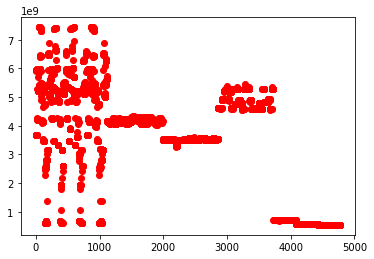

In [244]:
plt.plot(fulldataset["instructions"], 'ro')

In [245]:
fulldataset.to_csv("fulldataset-new.csv", index=False)

In [246]:
df = pd.read_csv("pcpPINJ1_500mbps_trainData1.csv", header=None, skiprows=2)
df2 = pd.read_csv("pcpPINJ1_5000mbps_trainData1.csv", header=None, skiprows=2)
df3 = pd.read_csv("pcpPINJ1_9000mbps_trainData1.csv", header=None, skiprows=2)

df.head()


,0,1,2,3,4,5,6
0,0.100572,147576350.0,branches,12394598,12.35,1470.037,M/sec
1,0.100572,25570.0,branch-misses,16395919,16.33,0.020,of all branches
2,0.100572,25477.0,branch-load-misses,16391884,16.33,0.254,M/sec
3,0.100572,2860.0,cache-misses,18605454,18.53,214.072,of all cache refs
4,0.100572,1336.0,cache-references,15997563,15.94,0.013,M/sec


In [247]:
df.rename (columns = {0  : 'time', 1 : 'value', 2 : 'feature'}, inplace=True )
df = df.set_index([ "time", "feature"])['value'].unstack()
df = df.reset_index()

df2.rename (columns = {0  : 'time', 1 : 'value', 2 : 'feature'}, inplace=True )
df2 = df2.set_index([ "time", "feature"])['value'].unstack()
df2 = df2.reset_index()

df3.rename (columns = {0  : 'time', 1 : 'value', 2 : 'feature'}, inplace=True )
df3 = df3.set_index([ "time", "feature"])['value'].unstack()
df3 = df3.reset_index()

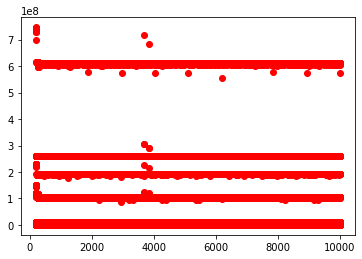

In [249]:
df = df.loc [ (df["time"] > 25) & (df["time"] < 60)]
df2 = df2.loc [ (df2["time"] > 25) & (df2["time"] < 60)]
df3 = df3.loc [ (df3["time"] > 25) & (df3["time"] < 60)]


In [250]:
df = df.loc [ (df["time"] > 25) & (df["time"] < 60)]
df2 = df2.loc [ (df2["time"] > 25) & (df2["time"] < 60)]
df3 = df3.loc [ (df3["time"] > 25) & (df3["time"] < 60)]

df["label"] = classes[LOW]
df2["label"] = classes[MED]
df3["label"] = classes[HIGH]

full = pd.concat( [df, df2, df3], ignore_index=True)

In [255]:
full = pd.concat([full, fulldataset], ignore_index=True)

In [256]:
full.to_csv("fulldataset-new.csv", index=False)